## Introduction to NFL Data with Python


#### Installing Packages

In [ ]:
# !pip install nfl_data_py
%pip install nfl_data_py

# !pip install pandas
%pip install pandas

# !pip install os
%pip install os

# !pip install matplotlib
%pip install matplotlib

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 28.0 MB/s eta 0:00:00
  Created wheel for nfl_data_py: filename=nfl_data_py-0.3.1-py3-none-any.whl size=13188 sha256=c17d5268b9bee8d25629dd72c72fd10d567ccd892ac167127cb35dda5f983ff6
  Stored in directory: /root/.cache/pip/wheels/ca/2e/d2/4def312ac7c070e1c0002e91ecc6923481a86c3ebd5b2c5413
Successfully built nfl_data_py
ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os


#### Loading in Packages

In [ ]:
import nfl_data_py as nfl
import pandas as pd
import os
import urllib.request
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

#### Loading in Play-by-Play Data

In [ ]:
#Importing current season data
import datetime
current_year = datetime.datetime.now().year
pbp = nfl.import_pbp_data([current_year])


2023 done.
Downcasting floats.


#### Looking at dataset

In [ ]:
pbp.shape

(28556, 384)

In [ ]:
pbp.head()

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,offense_formation,offense_personnel,defenders_in_box,defense_personnel,number_of_pass_rushers,players_on_play,offense_players,defense_players,n_offense,n_defense
0,1.0,2023_01_ARI_WAS,2023091007,WAS,ARI,REG,1,None,None,None,...,None,None,NaN,None,NaN,,,,0,0
1,39.0,2023_01_ARI_WAS,2023091007,WAS,ARI,REG,1,WAS,home,ARI,...,None,None,NaN,None,NaN,48000;52641;54721;56098;53639;53448;55912;4510...,00-0035150;00-0037330;00-0036896;00-0033251;00...,00-0036403;00-0038635;00-0036614;00-0039149;00...,11,11
2,55.0,2023_01_ARI_WAS,2023091007,WAS,ARI,REG,1,WAS,home,ARI,...,SHOTGUN,"1 RB, 2 TE, 2 WR",7.0,"3 DL, 4 LB, 4 DB",NaN,49410;54563;41475;52516;47812;46629;53445;4134...,00-0037746;00-0031095;00-0036334;00-0034445;00...,00-0035705;00-0035636;00-0036933;00-0036896;00...,11,11
3,77.0,2023_01_ARI_WAS,2023091007,WAS,ARI,REG,1,WAS,home,ARI,...,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 4 LB, 5 DB",4.0,49410;54563;41475;52516;47812;46629;53445;4134...,00-0037746;00-0031095;00-0036334;00-0034445;00...,00-0035705;00-0035636;00-0036933;00-0034375;00...,11,11
4,102.0,2023_01_ARI_WAS,2023091007,WAS,ARI,REG,1,WAS,home,ARI,...,I_FORM,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 4 LB, 5 DB",NaN,49410;41475;52516;47812;53445;46629;41349;5348...,00-0031095;00-0036334;00-0034445;00-0031260;00...,00-0035705;00-0035636;00-0036933;00-0034375;00...,11,11


In [ ]:
#All the data types we can use are shown here
pbp.columns

print(pbp.head().T)

columns_list = pbp.columns.tolist()
print(columns_list)

pd.set_option('display.max_rows', None)
print(pbp.columns.to_series().to_string(index=False))


                               0  \
play_id                      1.0   
game_id          2023_01_ARI_WAS   
old_game_id           2023091007   
home_team                    WAS   
away_team                    ARI   
...                          ...   
players_on_play                    
offense_players                    
defense_players                    
n_offense                      0   
n_defense                      0   

                                                                 1  \
play_id                                                       39.0   
game_id                                            2023_01_ARI_WAS   
old_game_id                                             2023091007   
home_team                                                      WAS   
away_team                                                      ARI   
...                                                            ...   
players_on_play  48000;52641;54721;56098;53639;53448;55912;4510...   
offense

In [ ]:
pbp.dtypes


play_id                                 float32
game_id                                  object
old_game_id                              object
home_team                                object
away_team                                object
season_type                              object
week                                      int32
posteam                                  object
posteam_type                             object
defteam                                  object
side_of_field                            object
yardline_100                            float32
game_date                                object
quarter_seconds_remaining               float32
half_seconds_remaining                  float32
game_seconds_remaining                  float32
game_half                                object
quarter_end                             float32
drive                                   float32
sp                                      float32
qtr                                     

#### Cleaning the Dataset



In [ ]:
#Sorting only runs and passes, removing special teams data
pbp_rp = pbp[(pbp['pass'] == 1) | (pbp['rush'] == 1)]
pbp_rp = pbp_rp.dropna(subset=['epa', 'posteam', 'defteam'])
pbp_rp.shape

(21321, 384)

#### Getting Stats

In [ ]:
pass_epa = pbp_rp[(pbp_rp['pass'] == 1)].groupby('posteam')['epa'].mean().reset_index().rename(columns = {'epa' : 'pass_epa'})
pass_epa.sort_values('pass_epa', ascending = False)

,posteam,pass_epa
28,SF,0.341704
8,DAL,0.202333
19,MIA,0.189813
25,PHI,0.175895
17,LAC,0.175202
3,BUF,0.174001
15,KC,0.161124
12,HOU,0.140408
20,MIN,0.114728
29,TB,0.099060


#### Merging the stats together

In [ ]:
rush_epa = pbp_rp[(pbp_rp['rush'] == 1)].groupby('posteam')['epa'].mean().reset_index().rename(columns = {'epa' : 'rush_epa'})
epa = pd.merge(pass_epa, rush_epa, on = 'posteam')
epa.head()

,posteam,pass_epa,rush_epa
0,ARI,-0.176484,-0.059688
1,ATL,-0.050539,-0.141191
2,BAL,0.067261,0.051954
3,BUF,0.174001,0.015218
4,CAR,-0.142957,-0.162820


#### Loading in the Logos

In [ ]:
logos = nfl.import_team_desc()[['team_abbr', 'team_logo_espn']]
logos.head()

,team_abbr,team_logo_espn
0,ARI,https://a.espncdn.com/i/teamlogos/nfl/500/ari.png
1,ATL,https://a.espncdn.com/i/teamlogos/nfl/500/atl.png
2,BAL,https://a.espncdn.com/i/teamlogos/nfl/500/bal.png
3,BUF,https://a.espncdn.com/i/teamlogos/nfl/500/buf.png
4,CAR,https://a.espncdn.com/i/teamlogos/nfl/500-dark...


In [ ]:
logo_paths = []
team_abbr = []
if not os.path.exists("logos"):
    os.makedirs("logos")

for team in range(len(logos)):
    urllib.request.urlretrieve(logos['team_logo_espn'][team], f"logos/{logos['team_abbr'][team]}.tif")
    logo_paths.append(f"logos/{logos['team_abbr'][team]}.tif")
    team_abbr.append(logos['team_abbr'][team])

data = {'team_abbr' : team_abbr, 'logo_path' : logo_paths}
logo_data = pd.DataFrame(data)

epa_with_logos = pd.merge(epa, logo_data, left_on = 'posteam', right_on = 'team_abbr')

#### Create the Graph

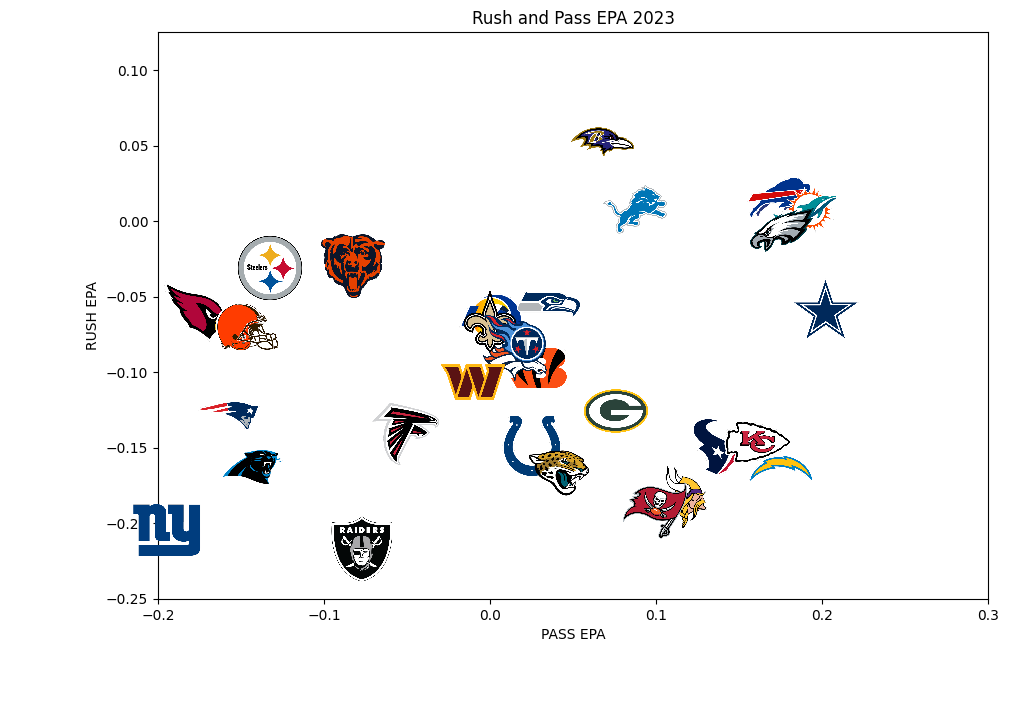

In [ ]:
plt.rcParams["figure.figsize"] = [10, 7]
plt.rcParams["figure.autolayout"] = True

def getImage(path):
    return OffsetImage(plt.imread(path, format="tif"), zoom=.1)

x = epa_with_logos['pass_epa']
y = epa_with_logos['rush_epa']
paths = epa_with_logos['logo_path']

fig, ax = plt.subplots()

for x0, y0, path in zip(x, y, paths):
   ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
   ax.add_artist(ab)

plt.xlim(-0.2, 0.3)
plt.ylim(-0.25, 0.125)
plt.title("Rush and Pass EPA" + " " + str(current_year))
plt.xlabel("PASS EPA")
plt.ylabel("RUSH EPA")
plt.show()

#### Putting Together Data for a Bar Graph

In [ ]:
receiver_yac = pbp_rp[(pbp_rp['pass'] == 1)].groupby('receiver_player_name').agg({'pass': 'count',
        'yards_after_catch': 'sum'}).reset_index().rename(columns = {'pass' : 'targets', 'yards_after_catch' : 'yac'})
receiver_yac = receiver_yac[(receiver_yac['targets'] >= 85)]
receiver_yac.sort_values('yac', inplace = True)

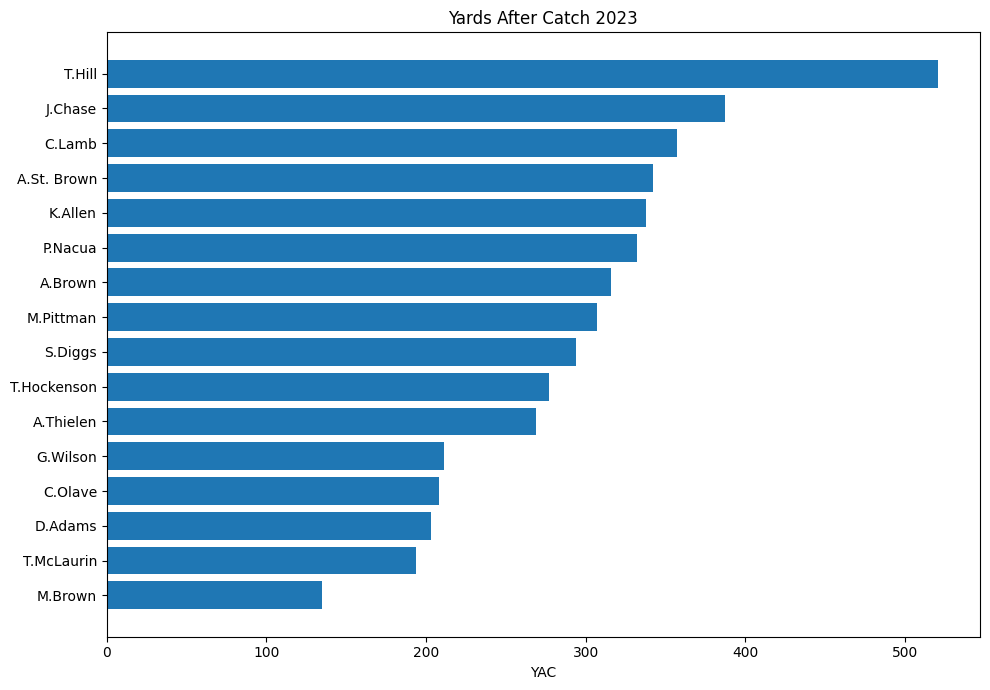

In [ ]:
name = receiver_yac['receiver_player_name']
yac = receiver_yac['yac']

fig, ax = plt.subplots(figsize=(10, 7))

ax.barh(name, yac)
ax.set_title("Yards After Catch" + " " + str(current_year))
ax.set_xlabel("YAC")
plt.show()